# ML framework collection applied to Titanic Kaggle dataset

## 1. Import Libraries

In [1]:
import pandas as pd  #Linear Algebra
import numpy as np  #Data Processing

#Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

#ML Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

import re

## 2. Import Files

In [2]:
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

## 3. Descriptive info on raw data

#### 3.1  Train Data

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 3.2  Test Data

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### 3.3  Percentage of Missing Values in each Column of Train Data

In [7]:
total = train_df.isnull().sum().sort_values()
percent = round((train_df.isnull().sum() / train_df.isnull().count()) * 100, 3).sort_values(ascending = False)
percent

Cabin          77.104
Age            19.865
Embarked        0.224
Fare            0.000
Ticket          0.000
Parch           0.000
SibSp           0.000
Sex             0.000
Name            0.000
Pclass          0.000
Survived        0.000
PassengerId     0.000
dtype: float64

In [8]:
total = test_df.isnull().sum().sort_values()
percent = round((test_df.isnull().sum() / test_df.isnull().count()) * 100, 3).sort_values(ascending = False)
percent

Cabin          78.230
Age            20.574
Fare            0.239
Embarked        0.000
Ticket          0.000
Parch           0.000
SibSp           0.000
Sex             0.000
Name            0.000
Pclass          0.000
PassengerId     0.000
dtype: float64

## 4. Raw data Exploratory Data Analysis (EDA) & visualization

###### Raw Data EDA is best way to generate first feature hypothesis

#### 4.1  Correlation Matrix

<IPython.core.display.Javascript object>


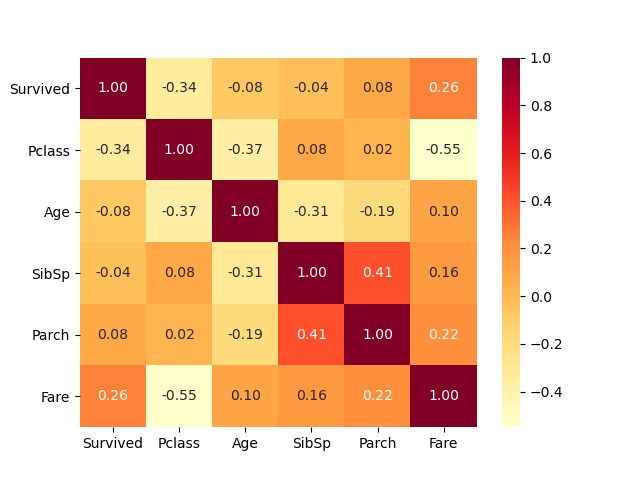

In [9]:
heat_map = sns.heatmap(train_df.iloc[:, 1:].corr(), annot=True, cmap = 'YlOrRd', fmt = '.2f')
plt.yticks(rotation = 0)
heat_map

#### 4.2  Age and Sex

<IPython.core.display.Javascript object>


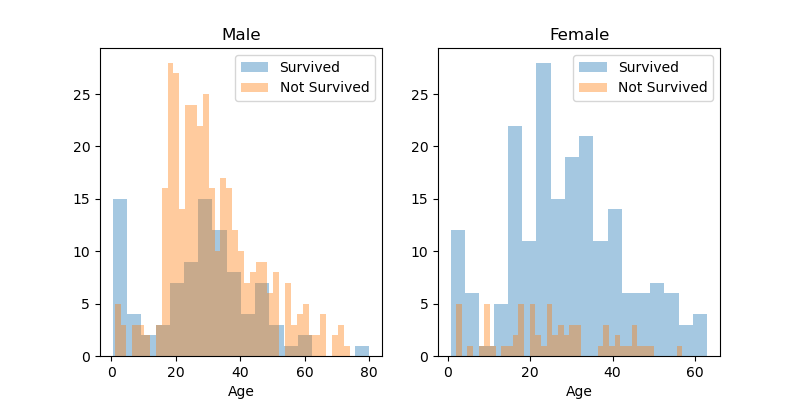

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(8, 4))

male = train_df[train_df.Sex == 'male']
female = train_df[train_df.Sex == 'female']

#MALE SURVIVAL PLOT
plot = sns.distplot(male[male.Survived == 1].Age.dropna(), bins=18, label = 'Survived', ax = axes[0], kde = False)
plot = sns.distplot(male[male.Survived == 0].Age.dropna(), bins=40, label = 'Not Survived', ax = axes[0], kde = False)
plot.set_title('Male')
plot.legend()

#FEMALE SURVIVAL PLOT
plot = sns.distplot(female[female.Survived == 1].Age.dropna(), bins=18, label = 'Survived', ax = axes[1], kde = False)
plot = sns.distplot(female[female.Survived == 0].Age.dropna(), bins=40, label = 'Not Survived', ax = axes[1], kde = False)
plot.set_title('Female')
plot.legend()

- High probability of survival for Males between age 18 to 32 years. 
- High probability of survival for Females between age 15 to 40 years.
- Very low probability of survival for Males betwee age 5 to 17 years.
- Infants have a high probability of survival.

#### 4.3 Sex and Survival

<IPython.core.display.Javascript object>


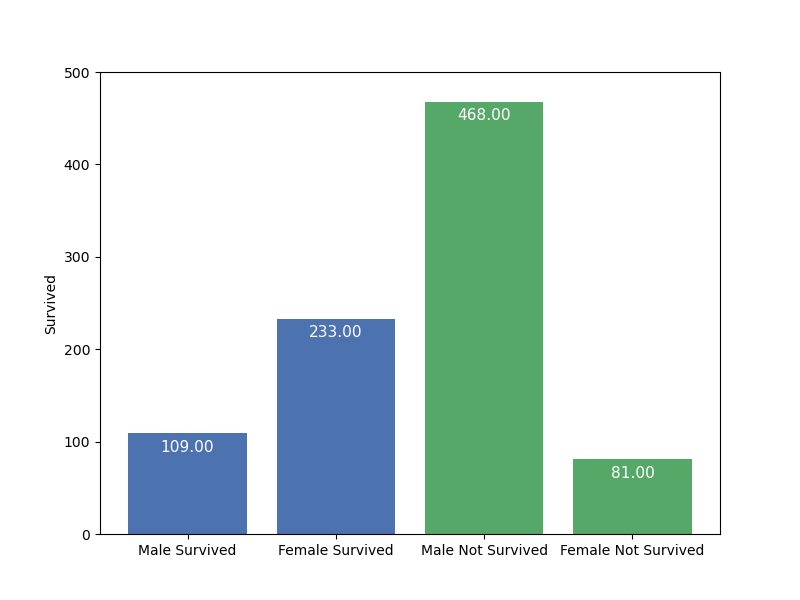

([<matplotlib.axis.YTick at 0x1e29f0da588>,
 <a list of 6 Text major ticklabel objects>)

In [11]:
fig, axes = plt.subplots(figsize=(8, 6))

female_survived = female[female.Survived == 1].Survived.count()
female_not_survived = female[female.Survived == 0].Survived.count()

male_survived = male[male.Survived == 1].Survived.count()
male_not_survived = male[male.Survived == 0].Survived.count()

counts = [male_survived, female_survived, male_not_survived, female_not_survived]

bars = plt.bar(np.arange(4), counts, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

for bar in bars:
    
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width() / 2, height - 20, '{0:.{1}f}'.format(height, 2), ha = 'center', color = 'w', fontsize = 11)

plt.xticks([0, 1, 2, 3], ['Male Survived', 'Female Survived', 'Male Not Survived', 'Female Not Survived'])
plt.xticks(rotation = 0)
plt.ylabel('Survived')
plt.yticks([0, 100, 200, 300, 400, 500])

Probability of Survival of Female is more than Male.

#### 4.4 Embarked, Pclass and Sex

<IPython.core.display.Javascript object>


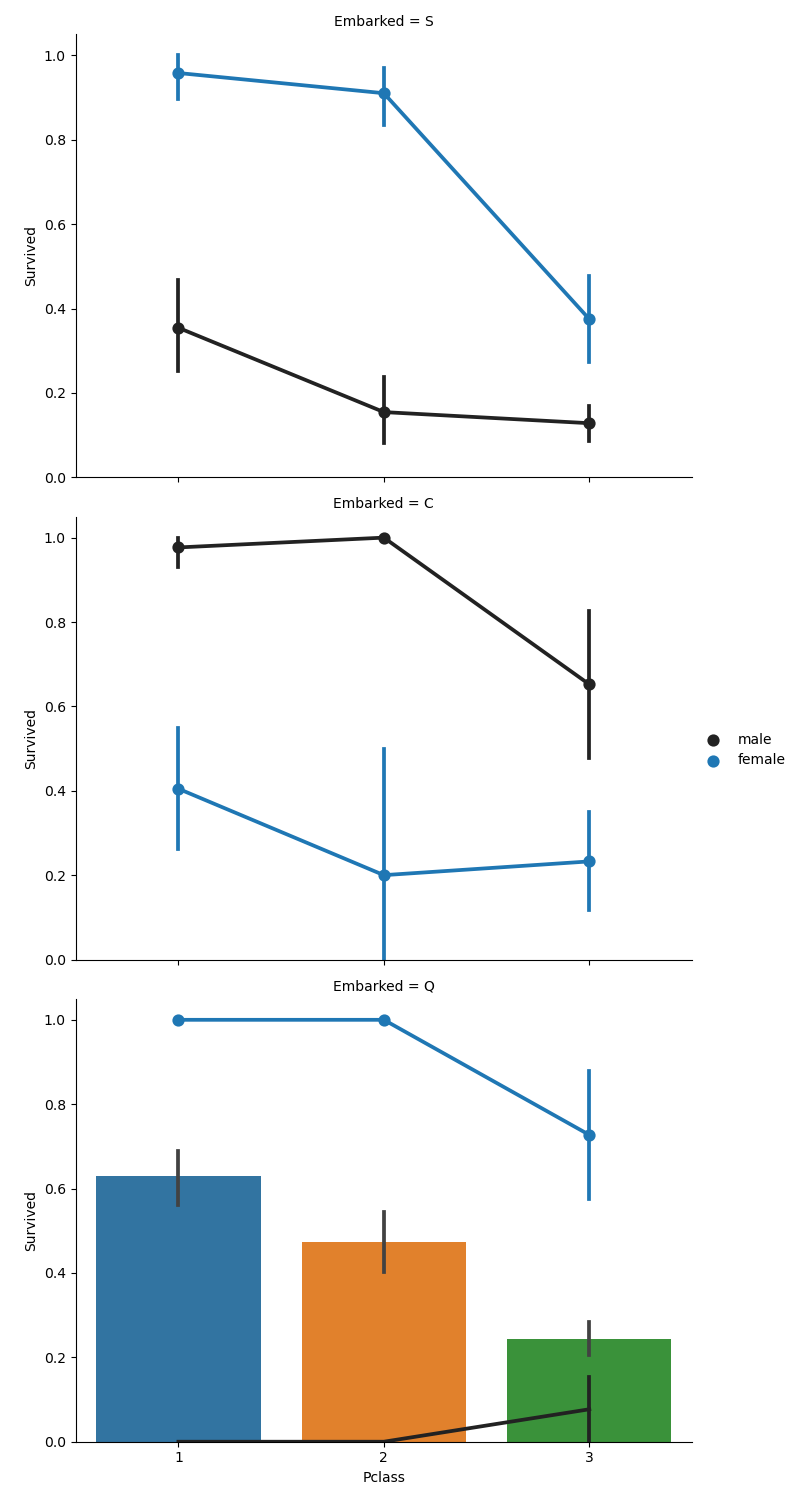

In [12]:
facetgrid = sns.FacetGrid(train_df, row = 'Embarked', height = 5, aspect = 1.4)
facetgrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None, hue_order = None, order = None)
facetgrid.add_legend()

- Embarked is correlated with survival, depending on Gender and Pclass.
- Females on Port (Embarked) Q and S have high probability of Survival and inverse is also true.
- Males on Port C has high probability of Survival but low probability for Females.

#### 4.5 Pclass

In [16]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train_df)

It's clear by seeing above plot that Persons in Class 1 has high probability of Survival then Class 2 and least probability in Class 3  

#### 4.5 Pclass and Age

<IPython.core.display.Javascript object>


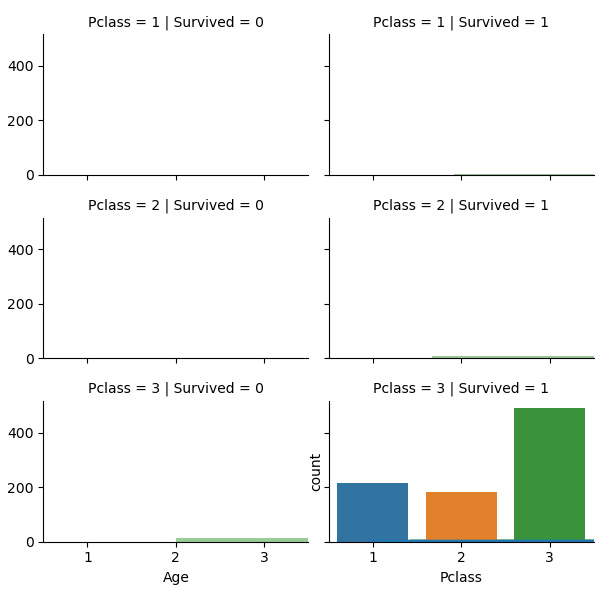

In [17]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', height = 2, aspect = 1.5)
grid.map(plt.hist, 'Age', alpha = 0.4, bins = 20, color = 'green')
grid.add_legend()

- Here, by seeing the above plot we can assure that probability of Not Survival (Survived = 0) of Class 1 is very high, and Class 1 is very low.
- Class 1 : Most Probability of Survival
- Class 2 : Moderate Probability of Survival
- Class 3 : Least Probability of Survival

#### 4.7 SibSp and Parch

We will combine SibSp and Parch

In [18]:
data = [train_df, test_df]

for dataset in data:
    
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    
    dataset.loc[dataset.relatives > 0, 'Not Alone'] = 0
    dataset.loc[dataset.relatives == 0, 'Not Alone'] = 1
    
    dataset['Not Alone'] = dataset['Not Alone'].astype(int)
    
train_df['Not Alone'].value_counts()

1    537
0    354
Name: Not Alone, dtype: int64

In [19]:
sns.pointplot('relatives', 'Survived', data = train_df)

High Probability of Survival with 1 to 3 relatives, but Low Probability of Survival for with less than 1 or more than 3.

## 5. Missing Values

We have 687 missing data in Cabin, 2 in Embarked and 177 in age.

#### 5.1 Droping PassengerId column

In [20]:
total = train_df.isnull().sum().sort_values(ascending = False)
total.head()

Cabin        687
Age          177
Embarked       2
Not Alone      0
relatives      0
dtype: int64

Removing PassengerId as it is irrevelent data to predict survival

In [21]:
train_df = train_df.drop(['PassengerId'], axis=1)

#### 5.2 Creating new feature from Cabin

In [22]:
data = [train_df, test_df]

deck = {"A": 1, "B": 2, "C": 3, "D": 4,
        "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in data:
    
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [23]:
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [24]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Not Alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1,3


#### 5.2 Pclass Distribution in Decks

In [25]:
sns.countplot(train_df.Pclass, order = [1, 2, 3])

In [26]:
def stacked_bars(feature):
    
    deck_1 = train_df[train_df['Deck']==1][feature].value_counts()
    deck_2 = train_df[train_df['Deck']==2][feature].value_counts()
    deck_3 = train_df[train_df['Deck']==3][feature].value_counts()
    deck_4 = train_df[train_df['Deck']==4][feature].value_counts()
    deck_5 = train_df[train_df['Deck']==5][feature].value_counts()
    deck_6 = train_df[train_df['Deck']==6][feature].value_counts()
    deck_7 = train_df[train_df['Deck']==7][feature].value_counts()
    deck_8 = train_df[train_df['Deck']==8][feature].value_counts()
    
    df = pd.DataFrame([deck_1, deck_2, deck_3, deck_4, deck_5, deck_6, deck_7, deck_8])
    
    df.index=['1','2','3','4','5','6','7','8']
    
    ax = df.plot(kind='bar',stacked=True,title='Feature Distribution')
    ax.set_xlabel("Decks")
    
    ax.set_ylabel(feature)

<IPython.core.display.Javascript object>


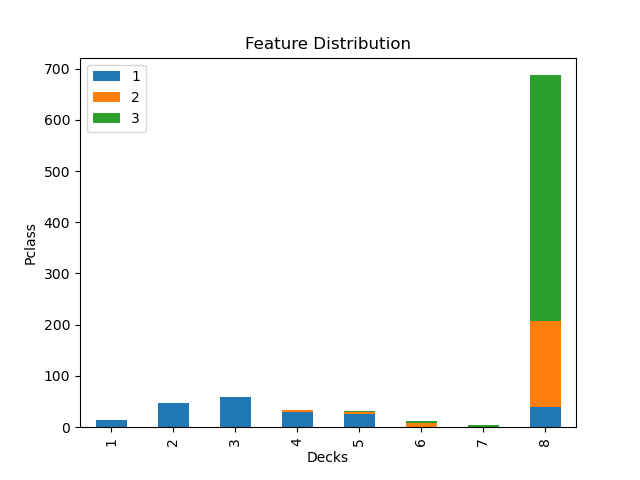

In [27]:
stacked_bars('Pclass')

<IPython.core.display.Javascript object>


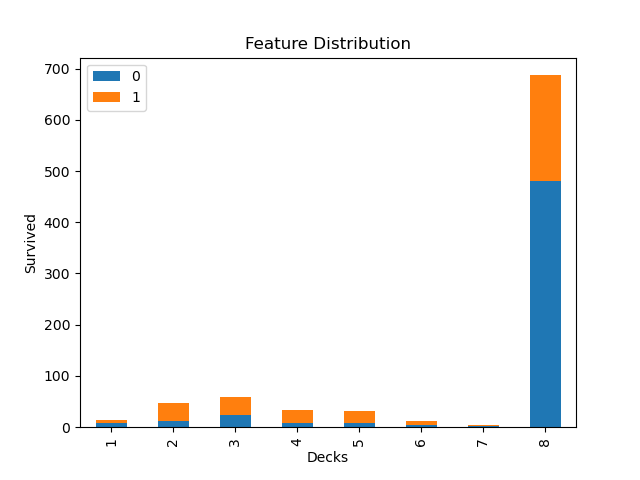

In [28]:
stacked_bars('Survived')

<IPython.core.display.Javascript object>


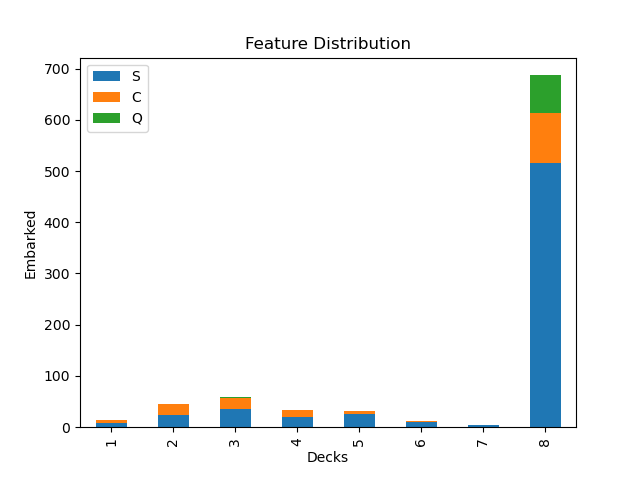

In [29]:
stacked_bars('Embarked')

#### 5.3 Filling missing values of Age 

In [30]:
data = [train_df, test_df]

for dataset in data:
    
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    
    is_null = dataset["Age"].isnull().sum()
    
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
train_df["Age"].isnull().sum()

0

#### 5.3 Filling missing values of Embarked 

###### Embarked has only 2 missing values so me will fill it with the most commom one

In [31]:
train_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [32]:
common = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common)
    
train_df["Embarked"].isnull().sum()

0

## 6. Converting Features

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  Not Alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


###### Now converting not  (Name, Sex, Ticket, Fare, Embarked) int values to int

#### 6.1 Name

In [34]:
data = [train_df, test_df]

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


In [35]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Not Alone,Deck,Title
0,892,3,male,22,0,0,330911,7.8292,Q,0,1,8,1
1,893,3,female,38,1,0,363272,7.0000,S,1,0,8,3
2,894,2,male,26,0,0,240276,9.6875,Q,0,1,8,1
3,895,3,male,35,0,0,315154,8.6625,S,0,1,8,1
4,896,3,female,35,1,1,3101298,12.2875,S,2,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,32,0,0,A.5. 3236,8.0500,S,0,1,8,1
414,1306,1,female,44,0,0,PC 17758,108.9000,C,0,1,3,5
415,1307,3,male,28,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1,8,1
416,1308,3,male,34,0,0,359309,8.0500,S,0,1,8,1


#### 6.2 Sex

In [36]:
data = [train_df, test_df]

genders = {'male' : 0, 
           'female' : 1}

for dataset in data:
    
    dataset['Sex'] = dataset['Sex'].map(genders)

In [37]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,Not Alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7.2500,S,1,0,8,1
1,1,1,1,38,1,0,PC 17599,71.2833,C,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,S,0,1,8,2
3,1,1,1,35,1,0,113803,53.1000,S,1,0,3,3
4,0,3,0,35,0,0,373450,8.0500,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,211536,13.0000,S,0,1,8,5
887,1,1,1,19,0,0,112053,30.0000,S,0,1,2,2
888,0,3,1,36,1,2,W./C. 6607,23.4500,S,3,0,8,2
889,1,1,0,26,0,0,111369,30.0000,C,0,1,3,1


#### 6.3 Ticket

In [38]:
train_df.Ticket.describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

###### Ticket has 681 unique values so we cannot group it, So drop Ticket

In [39]:
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

In [40]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not Alone,Deck,Title
0,0,3,0,22,1,0,7.2500,S,1,0,8,1
1,1,1,1,38,1,0,71.2833,C,1,0,3,3
2,1,3,1,26,0,0,7.9250,S,0,1,8,2
3,1,1,1,35,1,0,53.1000,S,1,0,3,3
4,0,3,0,35,0,0,8.0500,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,S,0,1,8,5
887,1,1,1,19,0,0,30.0000,S,0,1,2,2
888,0,3,1,36,1,2,23.4500,S,3,0,8,2
889,1,1,0,26,0,0,30.0000,C,0,1,3,1


#### 6.4 Fare

###### Fare has float values so we can easily convert it to int using astype()

In [41]:
data = [train_df, test_df]

for dataset in data:
    
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

###### Now grouping Fares

In [42]:
data = [train_df, test_df]

for dataset in data:
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    
    dataset['Fare'] = dataset['Fare'].astype(int)

In [43]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not Alone,Deck,Title
0,0,3,0,22,1,0,0,S,1,0,8,1
1,1,1,1,38,1,0,3,C,1,0,3,3
2,1,3,1,26,0,0,0,S,0,1,8,2
3,1,1,1,35,1,0,3,S,1,0,3,3
4,0,3,0,35,0,0,1,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,1,S,0,1,8,5
887,1,1,1,19,0,0,2,S,0,1,2,2
888,0,3,1,36,1,2,2,S,3,0,8,2
889,1,1,0,26,0,0,2,C,0,1,3,1


#### 6.5 Embarked

In [44]:
ports = {"S": 0, "C": 1, "Q": 2}

data = [train_df, test_df]

for dataset in data:
    
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [45]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not Alone,Deck,Title
0,0,3,0,22,1,0,0,0,1,0,8,1
1,1,1,1,38,1,0,3,1,1,0,3,3
2,1,3,1,26,0,0,0,0,0,1,8,2
3,1,1,1,35,1,0,3,0,1,0,3,3
4,0,3,0,35,0,0,1,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,1,0,0,1,8,5
887,1,1,1,19,0,0,2,0,0,1,2,2
888,0,3,1,36,1,2,2,0,3,0,8,2
889,1,1,0,26,0,0,2,1,0,1,3,1


In [46]:
data = [train_df, test_df]

for dataset in data:
    
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 66

In [47]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not Alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,8,5
887,1,1,1,2,0,0,2,0,0,1,2,2
888,0,3,1,5,1,2,2,0,3,0,8,2
889,1,1,0,3,0,0,2,1,0,1,3,1


#### 6.6 New Age * Class feature

In [48]:
data = [train_df, test_df]

for dataset in data:
    
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

#### 6.7 New Fare per Person feature

In [49]:
for dataset in data:
    
    dataset['fare_per_person'] = dataset['Fare'] / (dataset['relatives'] + 1)
    dataset['fare_per_person'] = dataset['fare_per_person'].astype(int)

In [50]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not Alone,Deck,Title,Age_Class,fare_per_person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,8,5,6,1
887,1,1,1,2,0,0,2,0,0,1,2,2,2,2
888,0,3,1,5,1,2,2,0,3,0,8,2,15,0
889,1,1,0,3,0,0,2,1,0,1,3,1,3,2


## 7. Train, Tune and Evaluate ML models

#### 7.1 Data Available

In [51]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Not Alone,Deck,Title,Age_Class,fare_per_person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,8,5,6,1
887,1,1,1,2,0,0,2,0,0,1,2,2,2,2
888,0,3,1,5,1,2,2,0,3,0,8,2,15,0
889,1,1,0,3,0,0,2,1,0,1,3,1,3,2


#### 7.2 Preparing Train and Test datasets for model 

In [52]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]

X_test  = test_df.drop("PassengerId", axis=1).copy()

#### 7.2 Train the models

##### 7.2.1 Decision Tree

In [53]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_predict_dt = decision_tree.predict(X_test)

decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 3)
decision_tree_score

92.368

In [54]:
%time
tree.plot_tree(decision_tree)

Wall time: 0 ns


NameError: name 'tree' is not defined

##### 7.2.2 Random Forest

In [55]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

y_predict_rf = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 3)
random_forest_score

92.368

##### 7.2.3 Linear Support Vector Machine (SVC)

In [56]:
linear_svc = LinearSVC()

linear_svc.fit(X_train, y_train)

y_predict_svc = linear_svc.predict(X_test)

svc_score = round(linear_svc.score(X_train, y_train) * 100, 2)
svc_score

C:\Users\soham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


81.14

##### 7.2.4 Support Vector Machine Classifier

In [57]:
svm = SVC(C = 5, random_state = 0)

svm.fit(X_train, y_train)

y_predict_svm = svm.predict(X_test)

svm_score = round(svm.score(X_train, y_train) * 100, 2)
svm_score

82.38

##### 7.2.5 Logistic Regression

In [58]:
log_reg = LogisticRegression(C = 5, penalty = 'l2', random_state = 0)

log_reg.fit(X_train, y_train)

y_predict_lr = log_reg.predict(X_test)

lr_score = round(log_reg.score(X_train, y_train) * 100, 2)
lr_score

C:\Users\soham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


81.93

##### 7.2.6 K Nearest Neighbors (KNN)

In [59]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

y_predict_knn = knn.predict(X_test)

knn_score = round(knn.score(X_train, y_train) * 100, 2)
knn_score

86.76

##### 7.2.7 Gaussian Naive Bayes

In [60]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_predict_gnb = gnb.predict(X_test)

gnb_score = round(gnb.score(X_train, y_train) * 100, 2)
gnb_score

78.23

#### 7.3 Score the Models

In [61]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Linear Support Vector Machine',
              'Support Vector Machine Classifier', 'Logistic Regression', 'K Nearest Neighbors', 
              'Gaussian Naive Bayes'],
    
    'Score': [decision_tree_score, random_forest_score, svc_score, 
              svm_score, lr_score, knn_score,
              gnb_score]})

result_data = results.sort_values(by = 'Score', ascending = False)
result_data = result_data.set_index('Score')

result_data

,Model
Score,
92.368,Decision Tree
92.368,Random Forest
86.760,K Nearest Neighbors
82.380,Support Vector Machine Classifier
81.930,Logistic Regression
81.140,Linear Support Vector Machine
78.230,Gaussian Naive Bayes


#### 7.4 K - Fold Cross Validation

In [62]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, cv = 10, scoring = 'accuracy')

print("Decision Tree Classifier")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy')

print("\nRandom Forest Classifier")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())



Decision Tree Classifier
Scores: [0.7        0.79775281 0.74157303 0.83146067 0.86516854 0.79775281
 0.78651685 0.76404494 0.86516854 0.83146067]
Mean: 0.7980898876404494
Standard Deviation: 0.050334194339515415


NameError: name 'Y_train' is not defined

#### 7.5 Important Features

In [63]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance' : np.round(random_forest.feature_importances_,3)})

importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
Title,0.211
Sex,0.166
Age_Class,0.097
Deck,0.083
Age,0.075
Pclass,0.074
Fare,0.067
relatives,0.065
Embarked,0.053


<IPython.core.display.Javascript object>


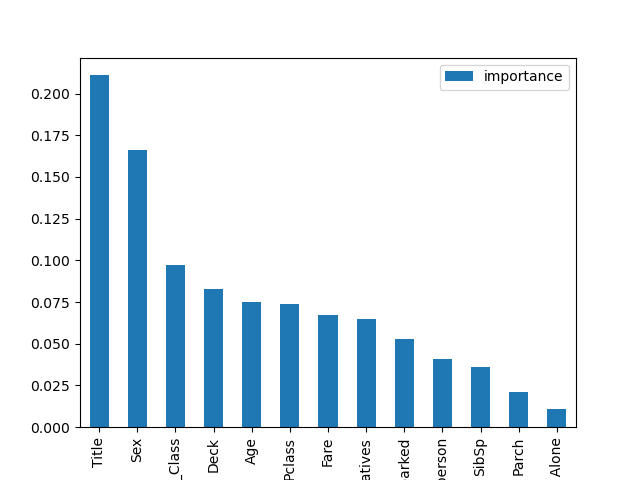

In [64]:
importances.plot.bar()

###### Not Alone and Parch is not important so we can drop it

In [65]:
train_df  = train_df.drop("Not Alone", axis=1)
test_df  = test_df.drop("Not Alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [66]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,fare_per_person
0,0,3,0,2,1,0,0,1,8,1,6,0
1,1,1,1,5,1,3,1,1,3,3,5,1
2,1,3,1,3,0,0,0,0,8,2,9,0
3,1,1,1,5,1,3,0,1,3,3,5,1
4,0,3,0,5,0,1,0,0,8,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,1,0,0,8,5,6,1
887,1,1,1,2,0,2,0,0,2,2,2,2
888,0,3,1,5,1,2,0,3,8,2,15,0
889,1,1,0,3,0,2,1,0,3,1,3,2


#### 7.6 Decision Tree 2nd run (after removing unimportant features)

In [67]:
decision_tree2 = DecisionTreeClassifier()

decision_tree2.fit(X_train, y_train)

y_predict_dt2 = decision_tree2.predict(X_test)

decision_tree_score2 = round(decision_tree2.score(X_train, y_train) * 100, 3)
decision_tree_score2

92.368

#### 7.7 Random Forest 2nd run (after removing unimportant features)

In [70]:
random_forest2 = RandomForestClassifier(n_estimators = 100, oob_score = True)

random_forest2.fit(X_train, y_train)

Y_predict_rf2 = random_forest2.predict(X_test)

random_forest_score2 = round(random_forest2.score(X_train, y_train) * 100, 2)
random_forest_score2

92.37

#### 7.8 Evaluation with Confusion Matrix

In [72]:
predictions = cross_val_predict(random_forest, X_train, y_train, cv = 3)
confusion_matrix(y_train, predictions)

array([[483,  66],
       [100, 242]], dtype=int64)

#### 7.9 Precision and Recall

In [74]:
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7857142857142857
Recall: 0.7076023391812866


#### 7.10 F - Score

In [76]:
f1_score(y_train, predictions)

0.7446153846153847

#### 7.11 Precision and Recall Curve

<IPython.core.display.Javascript object>


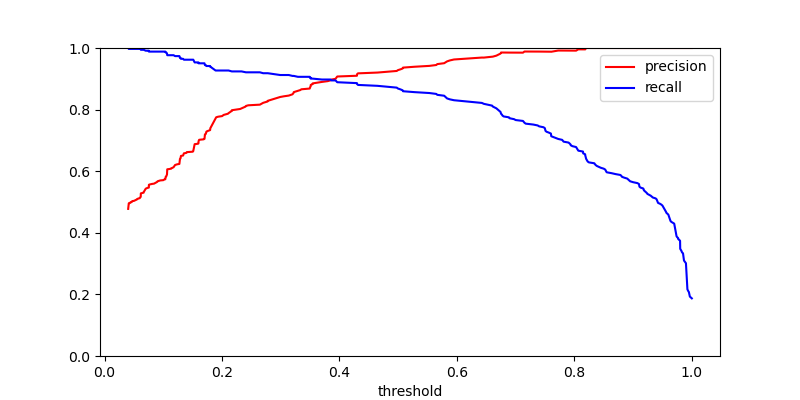

In [78]:
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    
    plt.plot(threshold, precision[:-1], "r-", label="precision")
    plt.plot(threshold, recall[:-1], "b", label="recall")
    plt.xlabel("threshold")
    plt.legend()
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_and_recall(precision, recall, threshold)

## 8. Export output to csv 

In [79]:
output = pd.DataFrame({'PassengerId' : test_df.PassengerId, 'Survived' : y_predict_dt})

output.to_csv('my_submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
